In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


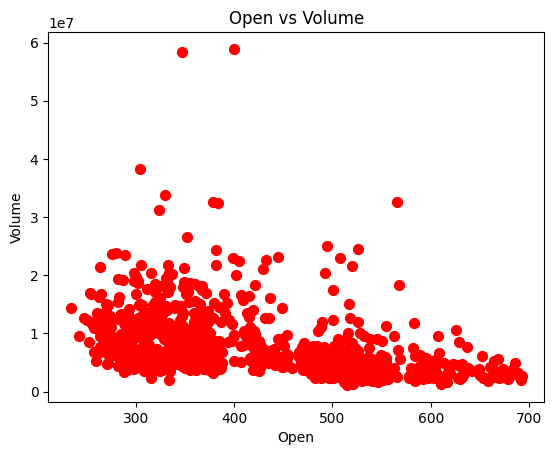

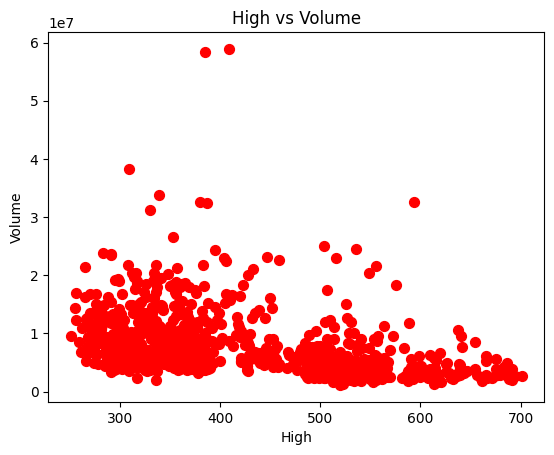

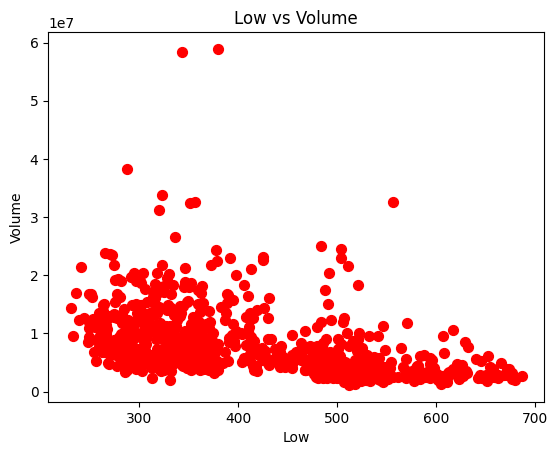

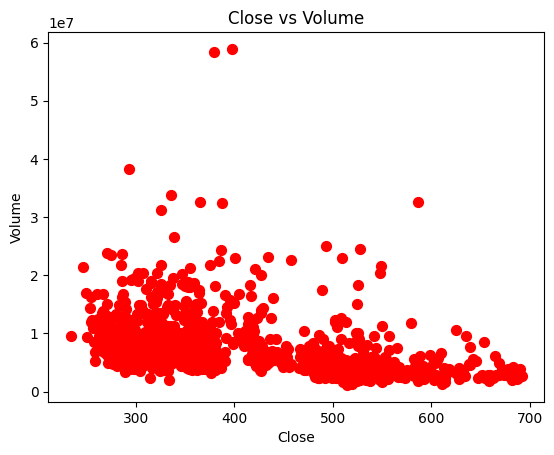

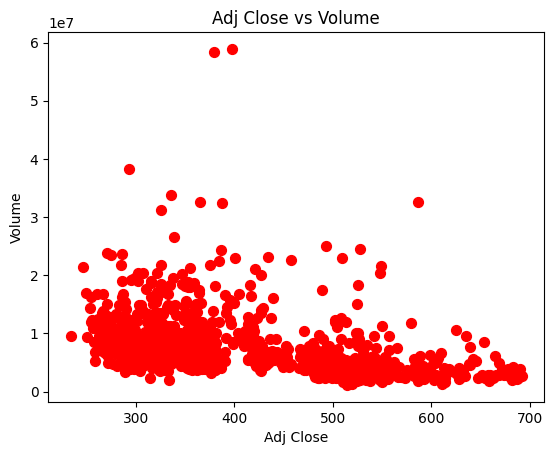

Mean Coefficients:
Intercept: 14523217.45888
Open: 29738885.21831
High: 163801354.16481
Low: -249590949.95507
Close: 21007039.45691
Adj Close: 21007039.45691

Standard Deviation of Coefficients:
Intercept: 696214.48448
Open: 25558630.78687
High: 20257015.21636
Low: 35753469.67620
Close: 12595376.98118
Adj Close: 12595376.98118


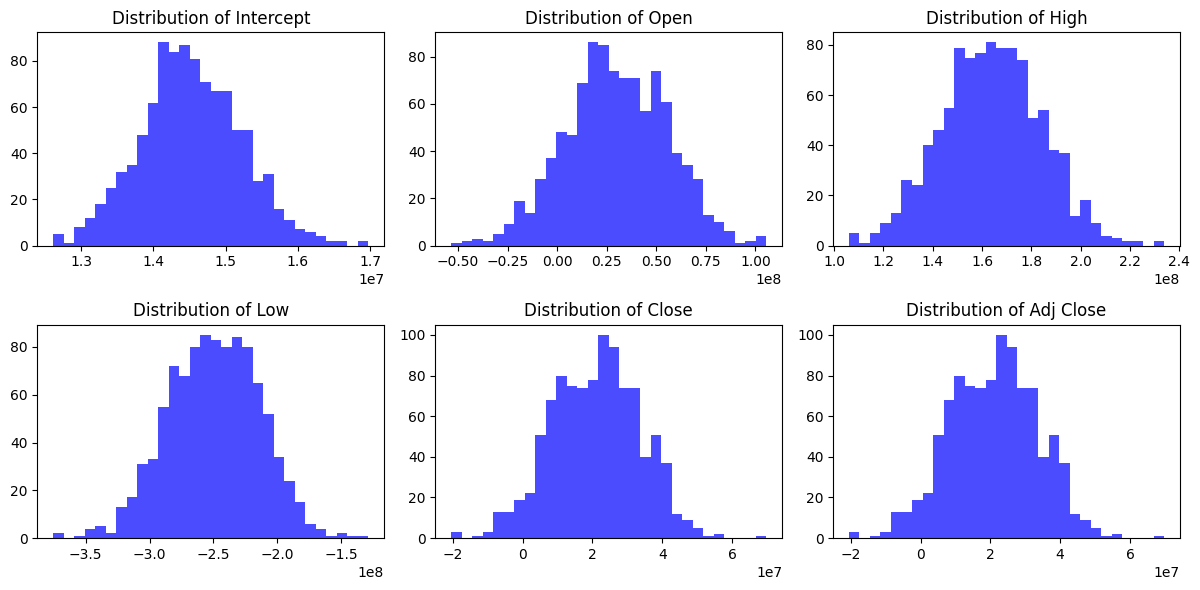

Enter opening price: 0.80
Enter high price: 0.90
Enter low price: 0.75
Enter closing price: 0.85
Enter Adjusted closing price: 0.85
Predicted volume for your features is: 34254298.99230


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define the linear_regression function
def linear_regression(X, y):
    X_transpose = X.T
    coeff = (np.linalg.pinv(X_transpose @ X)) @ X_transpose @ y
    return coeff

# Load the data
data = pd.read_csv('/content/NFLX.csv')

# Define features and target
features = data.drop(['Date', 'Volume'], axis=1)
target = data['Volume']

# Define numerical features
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Visualize the relationship between each numerical feature and the target (Volume)
for feature in numerical_features:
    plt.scatter(features[feature], target, c='red', s=50)
    plt.xlabel(feature)
    plt.ylabel('Volume')
    plt.title(f'{feature} vs Volume')
    plt.show()

# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=13)

# Define the number of bootstrap samples
num_samples = 1000

# Initialize an array to store the coefficients from each bootstrap sample
bootstrap_coefficients = np.zeros((num_samples, X_train.shape[1] + 1))

# Perform Bootstrap
for i in range(num_samples):
    # Generate random indices with replacement to create a bootstrap sample
    indices = np.random.choice(X_train.shape[0], X_train.shape[0], replace=True)
    X_bootstrap = X_train[indices]
    y_bootstrap = y_train.iloc[indices]

    # Add a column of ones for the intercept term
    X_bootstrap = np.column_stack((np.ones(X_bootstrap.shape[0]), X_bootstrap))

    # Fit linear regression to the bootstrap sample
    bootstrap_coefficients[i, :] = linear_regression(X_bootstrap, y_bootstrap)

# Calculate the mean and standard deviation of coefficients from Bootstrap
mean_coefficients = np.mean(bootstrap_coefficients, axis=0)
std_coefficients = np.std(bootstrap_coefficients, axis=0)

# Print the mean and standard deviation of the coefficients
print("Mean Coefficients:")
for feature, coef in zip(['Intercept'] + numerical_features, mean_coefficients):
    print(f"{feature}: {coef:.5f}")

print("\nStandard Deviation of Coefficients:")
for feature, std in zip(['Intercept'] + numerical_features, std_coefficients):
    print(f"{feature}: {std:.5f}")

# Visualize the distribution of coefficients using histograms
plt.figure(figsize=(12, 6))
for i in range(X_train.shape[1] + 1):
    plt.subplot(2, 3, i + 1)
    feature_name = ['Intercept'] + numerical_features
    plt.hist(bootstrap_coefficients[:, i], bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature_name[i]}')
plt.tight_layout()
plt.show()

# Now you can make predictions and calculate metrics as before
# ...

# Prompt the user for input to make predictions
Open = float(input("Enter opening price: "))
High = float(input("Enter high price: "))
Low = float(input("Enter low price: "))
Close = float(input("Enter closing price: "))
Adj_Close = float(input("Enter Adjusted closing price: "))

# Calculate the predicted volume using the mean coefficients
predicted_volume = (
    mean_coefficients[0] +
    mean_coefficients[1] * Open +
    mean_coefficients[2] * High +
    mean_coefficients[3] * Low +
    mean_coefficients[4] * Close +
    mean_coefficients[5] * Adj_Close
)

print(f'Predicted volume for your features is: {predicted_volume:.5f}')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Load your data here, e.g., assuming you've already loaded it into "features" and "target"

# Define the number of bootstrap samples
num_samples = 1000

# Initialize arrays to store model predictions
y_pred_samples = np.zeros((num_samples, len(y_test)))

for i in range(num_samples):
    # Split the data into training and testing sets for each bootstrap sample
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=23)

    # Create a MinMaxScaler and fit it to the training data for this bootstrap sample
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create and fit an SVR model for the bootstrap sample
    svr = SVR(kernel='linear')  # You can change the kernel type as needed
    svr.fit(X_train, y_train)

    # Make predictions on the test set for this bootstrap sample
    y_pred = svr.predict(X_test)
    y_pred_samples[i, :] = y_pred

# Calculate the mean and standard deviation of predictions
mean_predictions = np.mean(y_pred_samples, axis=0)
std_predictions = np.std(y_pred_samples, axis=0)

# Calculate and print the metrics for the mean predictions
mse = mean_squared_error(y_test, mean_predictions)
mae = mean_absolute_error(y_test, mean_predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

# Now you can make predictions for user input
Open = float(input("Enter opening price: "))
High = float(input("Enter high price: "))
Low = float(input("Enter low price: "))
Close = float(input("Enter closing price: "))
Adj_Close = float(input("Enter Adjusted closing price: "))

# Use the same MinMaxScaler that was fitted to the training data
user_inputs_scaled = scaler.transform(np.array([[Open, High, Low, Close, Adj_Close]]))

predicted_prices = svr.predict(user_inputs_scaled)

# Calculate the mean prediction from the bootstrap sample predictions
predicted_price = np.mean(predicted_prices)

print(f"Predicted Price: {predicted_price:.2f}")


Mean Squared Error (MSE): 33588164847517.24609
Mean Absolute Error (MAE): 3558447.50636
Root Mean Squared Error (RMSE): 5795529.72967
Enter opening price: 252.14
Enter high price: 259.15
Enter low price: 249
Enter closing price: 257.95
Enter Adjusted closing price: 257.95
Predicted Price: 5784433.52


<ipython-input-17-974677fe2e53>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.781e+15, tolerance: 2.507e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.781e+15, tolerance: 2.

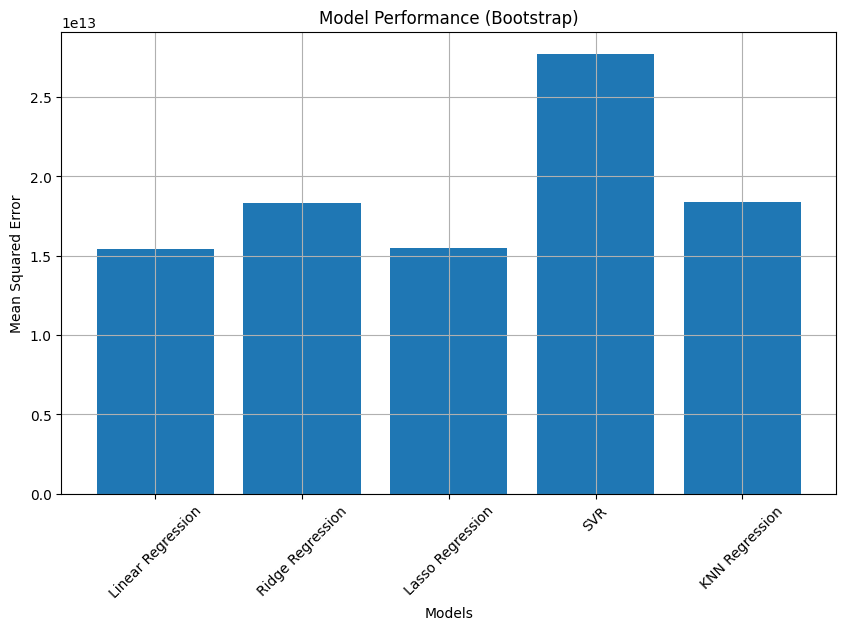

The Best Model (Bootstrap) is Linear Regression with a Mean MSE of 15411068344867.20
Coefficients for Linear Regression:
[ 1.45057976e+07  1.45993454e+07  1.64771879e+08 -2.47329349e+08
  2.73144915e+07  2.73144915e+07]
Standard Errors for Linear Regression:
[  627570.15290582 17416517.20990384 18611903.95957183 17366909.16971402
  8474367.58463286  8474367.58463286]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import statsmodels.api as sm

# Load your data here, e.g., assuming you've already loaded it into "features" and "target"
data = pd.read_csv('/content/NFLX.csv')
data.fillna(data.mean(), inplace=True)
features = data.drop(['Date', 'Volume'], axis=1)
target = data['Volume']

# Define the number of bootstrap samples
num_samples = 1000

# Initialize dictionaries to store model results
results = {}

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Initialize results dictionary for each model
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
    "SVR": SVR(kernel='linear'),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5)
}

for model_name in models.keys():
    results[model_name] = {"MSE": [], "Coefficients": [], "Standard Errors": []}

for i in range(num_samples):
    # Split the data into training and testing sets for each bootstrap sample
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Scale the data using the MinMaxScaler for this bootstrap sample
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_pred)
        results[model_name]["MSE"].append(mse)

        # Calculate coefficients and standard errors using statsmodels
        X_with_intercept = sm.add_constant(X_train_scaled)
        model_sm = sm.OLS(y_train, X_with_intercept).fit()
        coefficients = model_sm.params
        standard_errors = model_sm.bse

        results[model_name]["Coefficients"].append(coefficients)
        results[model_name]["Standard Errors"].append(standard_errors)

# Calculate the mean MSE for each model across bootstrap samples
mean_mse_results = {model_name: np.mean(results[model_name]["MSE"]) for model_name in models.keys()}

plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_mse_values)
plt.title("Model Performance (Bootstrap)")
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Print the coefficients and standard errors for the best model (you can adjust as needed)
best_model_name = min(mean_mse_results, key=lambda k: mean_mse_results[k])

print(f"The Best Model (Bootstrap) is {best_model_name} with a Mean MSE of {mean_mse_results[best_model_name]:.2f}")

best_model_coefficients = np.mean(results[best_model_name]["Coefficients"], axis=0)
best_model_standard_errors = np.mean(results[best_model_name]["Standard Errors"], axis=0)

print(f"Coefficients for {best_model_name}:")
print(best_model_coefficients)
print(f"Standard Errors for {best_model_name}:")
print(best_model_standard_errors)
